## Monochrome fit
### To run this notebook, please [follow the instructions](https://lasair-lsst.readthedocs.io/en/main/core_functions/python-notebooks.html) or else it won`t work.
The instructions are at https://lasair-lsst.readthedocs.io/en/main/core_functions/python-notebooks.html

This notebook shows how the BazinBlackBody features work. It attempts two 2D fits: one models
the flux as exponential in time and blackbody in  wavelength, the other as bazin in time 
(exp rise and exp fall) and blackbody in  wavelength. 
Note that exponential rise of flux is linear rise of magnitude.

In [1]:
import json, sys, math
from IPython.display import Image, display

In [2]:
%%bash
if [ ! -d "lasair-lsst" ] ; then
    git clone https://github.com/lsst-uk/lasair-lsst.git
fi

In [3]:
import importlib  
BBBcode = "lasair-lsst.pipeline.filter.features.BBBEngine"
BBBEngine = importlib.import_module(BBBcode)

## Fitting a monochrome lightcurve
The axes are wavelength (microns) and time (days). 
The functions are exponential in time (linear in magnitude) times blackbody; 
and Bazin in time (exp rise then exp fall) times blackbody.

In [4]:
# Here is a fake alert
file = 'SNIbc_312228'
alert = json.loads(open('../json/%s.json'%file).read())

discoveryMJD = alert['diaSourcesList'][0]['midpointMjdTai']
print(discoveryMJD)

59582.3282


The return from the fitting is the best of either ExpBB and BazinBB. The dictionary carries 
the fitting paramters, and also `Rsq`, the remaining variance after the fit, compared to the variance about the mean.

In [5]:
alertMonochrome = alert.copy()
print(len(alert['diaSourcesList']), 'points in lightcurve')
newDiaSourcesList = []
for ds in alert['diaSourcesList']:
    if ds['band'] == 'g':
        newDiaSourcesList.append(ds)
alertMonochrome['diaSourcesList'] = newDiaSourcesList
print(len(alertMonochrome['diaSourcesList']), 'points in monochrome lightcurve')

57 points in lightcurve
10 points in monochrome lightcurve


In [6]:
BE = BBBEngine.BBB('LSST', nforced=4, ebv=0, A=100, T=4, t0=6, kr=0.1, kf=0.01, verbose=True)
fit =  BE.make_fit(alertMonochrome)

12345678 has 10
Bazin: T=5.80 (g-r=0.355), kr=0.139, kf=0.044


Rsq fit is 0.0118


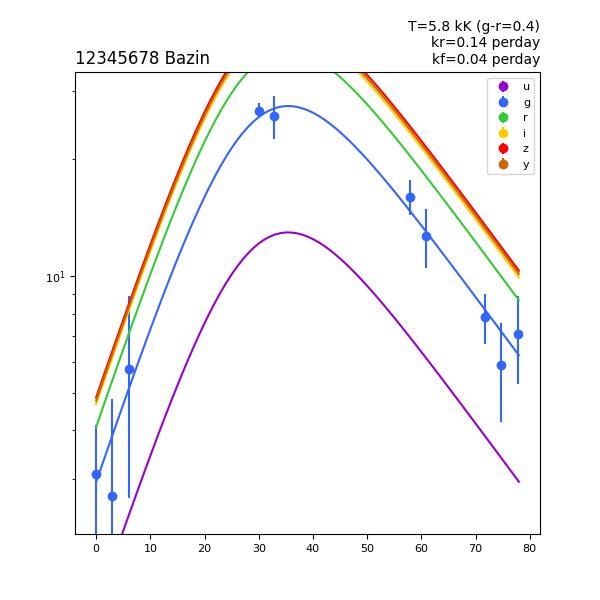

In [7]:
if fit:
    print('Rsq fit is %.4f' % fit['Rsq'])
    filename = '../image/%s_monochrome.png'%file
    BE.plot(alertMonochrome, fit, filename, size=6)
    display(Image(filename=filename))